**Devoir PHYS-F-302, année académique 2019-2020** 

Soit l'équation différentielle ordre 4 linéaire à coefficients constants:

$$
\begin{equation}
\frac{d^4 f}{dx^4}-5 \frac{d^2 f}{dx^2}+ 4f = 0
\end{equation}
$$

où $f$ est une fonction de la variable $x\in [0\ 1]$. Par ailleurs, on a les conditions aux bords suivantes:

$$
\begin{equation}
f(0)=a, f'(0)=b, f(1)=c, f'(1)=d 
\end{equation}
$$

La solution générale de cette équation se calcule comme ceci :
On calcule tout d'abord le déterminant de l'équation caractéristique.
L’équation caractéristique à résoudre est : 
$$
\begin{equation}
m^2 -5m +4 = 0 
\end{equation}
$$
où m = $f^2$
$$
\begin{equation}
f = 1, -1 , -\sqrt2 , \sqrt2 
\end{equation}
$$

Les racines de ce polynôme de degré 4 serviront à déterminer un ensemble fondamental de solutions, c’est à dire un ensemble de n fonctions linéairement indépendantes. En combinant ces fonctions avec n constantes arbitraires réelles, on obtient la solution homogène cherchée.
Alors la solution générale de l'équation (1) est 
$$
\begin{equation}
f(x)= C_1 e^{x} + C_2 e^{-x}+ C_3 e^{-\sqrt2 x}+ C_4 e^{\sqrt2 x}
\end{equation}
$$

avec $C_1, C_2, C_3, C_4$ des constantes d'intégrations à évaluer par rapport aux conditions initiales. 

Pour déterminer une solution générale en fonction des conditions de bords (2) il faut résoudre un système de 4 équations à 4 inconnus $C_1, C_2, C_3, C_4$ : 
$$
\begin{equation}
f(0)= C_1 + C_2 + C_3 + C_4  = 0 
\end{equation}
$$
$$
\begin{equation}
f'(0)= C_1 - C_2 -\sqrt(2)C_3 +\sqrt(2)C_4 = 0 
\end{equation}
$$
$$
\begin{equation}
f(1)= C_1 e^{1} + C_2 e^{-1}+ C_3 e^{-\sqrt2}+ C_4 e^{\sqrt2} = 1 
\end{equation}
$$
$$
\begin{equation}
f'(1)= C_1 e^{1} + C_2 e^{-1} -\sqrt2 C_3 e^{-\sqrt2}+ \sqrt2 C_4 e^{\sqrt2} = -1 
\end{equation}
$$

On utilise pour cela la fonction python "linalg.solve" qui résoud un système d'équation linéaire

In [6]:
from matplotlib import pyplot
import numpy as np
from scipy import stats
from math import *
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

import numba
from numba import jit
print(numba.__version__)

0.44.1


In [7]:
#Défition de la fonction solution générale de (1)
def f(x,a,b,c,d):
    
    f=a*exp(x)+b*exp(-x)+c*exp(-sqrt(2)*x)+d*exp(sqrt(2)*x)

    return f 

In [8]:
#Evaluation des constantes d'intégrations pour : 

a=0
b=0
c=1
d=-1

systeme = np.array([[1,1,1,1], [1,-1,-sqrt(2),sqrt(2)], [exp(1),exp(-1),exp(-sqrt(2)),exp(sqrt(2))], [exp(1),-exp(-1),-sqrt(2)*exp(-sqrt(2)),sqrt(2)*exp(sqrt(2))]])
inconnu = np.array([a,b,c,d])
cst = np.linalg.solve(systeme, inconnu)

print('Constantes d\'intégrations : C1= {}'.format(cst[0]) +
      ' C2= {}'.format(cst[1]) + 
      ' C3= {}'.format(cst[2]) + 
      ' C4= {}'.format(cst[3]))



Constantes d'intégrations : C1= 6.7169834918467695 C2= -14.848262224881811 C3= 11.690105108643984 C4= -3.55882637560894


On évalue la fonction pour $a=0, b=0, c=1, d=-1$ et on trace $f$ en fonction de $x\in [0\ 1]$.

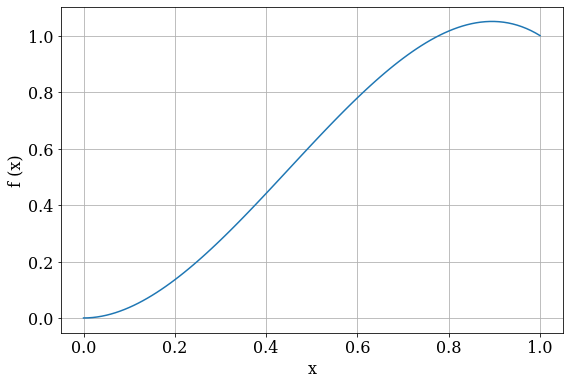

In [7]:
#On discrétise l'intervale de x comme ceci 
nx = 101  # nombre de point dans la direction x 
Lx = 1.0  # longueur du domaine dans la direction x 

x = np.linspace(0.0, Lx, num=nx)
fth= np.zeros(nx)

for i in range (nx) :
    fth[i]=f(x[i],cst[0],cst[1],cst[2],cst[3])

pyplot.figure(figsize=(9.0, 6.0))
pyplot.plot(x,fth)
pyplot.xlabel('x')
pyplot.ylabel('f (x)')
pyplot.grid()
pyplot.show()

**Gauss-Seidel**

Résolution de l'équation (1) avec la méthode Gauss-Seidel. 

On discrétise d'abord l'équation (1) : 
Pour cela on utilise des différences finies centrées d'ordre 2 et 4 pour , on obtient:

$$
\begin{equation}
 0 = \frac{f_{i-2}-4f_{i-1}+6f_{i}-4f_{i-1}+f_{i-2}}{\Delta x^4} -5 \frac{f_{i-1}-2f_{i}+f_{i-1}}{\Delta x^2} + 4f_i 
\end{equation}
$$

La méthode de Gauss Seidel diffère de celle de Jacobi dans le sens où on utilise les valeurs mises à jour de la solution dés qu'elles sont disponibles au lieu d'attendre que l'entièretée de la grille au temps soient mise à jour. 

Si on imagine que on progresse une droite de longueur 1 discrétisée en nx point et que on se déplace dans le temps dessus de i=0 vers i = nx, alors on peut voir les valeurs mises à jour $f^{k+1}_{i-1}$ and $f^{k+1}_{i-2}$ peuvent être utilisées pour calculer $f^{k+1}_{i}$.

La formule d'itération pour Gauss-Seidel est alors:

$$
\begin{equation}
f^{k+1}_{i}= \frac{1}{B} (f^{k+1}_{i-2} + f^{k}_{i+2} + C(f^{k}_{i+1}+f^{k+1}_{i-1}))
\end{equation}
$$

en posant 

$$
\begin{align}
 B = -6 - 10\Delta x^2 - 4\Delta x^4 \\
 C= -4 - 5\Delta x^2
\end{align}
$$


On a maintenant besoin de prendre en compte les conditions au bords pour pouvoir définir les points $f_{i=1}$ et $f_{i=nx-2}$ sachant que : 
Remarque on a compté les indices de 0 à nx-1.

$f(0) = f_{i=0}$ = 0 et $f(x=1) = f_{i=nx-1} = 1$

Quand on effectue une approximation centrée d'ordre 2 de $f(x)$ on obtient que : 

$$
\begin{equation}
f'(0) \approx \frac{f^{k+1}_{1} - f^{k+1}_{-1}}{2 \Delta x} = 0
\end{equation}
$$

alors 

$$
\begin{equation}
f^{k+1}_{-1} = f^{k+1}_{1}
\end{equation}
$$

et 

$$
\begin{equation}
f'(1) \approx \frac{f^{k+1}_{nx-2} - f^{k+1}_{nx}}{2 \Delta x} = -1
\end{equation}
$$

alors 

$$
\begin{equation}
f^{k+1}_{nx} = f^{k+1}_{nx-2} + 2\Delta x
\end{equation}
$$

On insère ces égalités dans les relations pour $f_{i=1}$ et $f_{i=-2}$ : 

$$
\begin{align}
f^{k+1}_{i=1}= \frac{1}{B-1} (f^{k+1}_{3} + C(f^{k}_{0}+f^{k+1}_{2})) \\
f^{k+1}_{i=nx-2}= \frac{1}{B-1} (f^{k+1}_{nx-4} + C(f^{k}_{nx-3}+f^{k+1}_{nx-1})- 2\Delta x)
\end{align}
$$

Et on fait converger les méthodes itératives jusqu'à ce que la différence en norme L2 de deux itérations successives soit $\leq 10^{-8}$.

In [12]:
#Différence en norme L2 entre f et fn. 
def L2_rel_erreur(f, fn):
    
    return np.sqrt(np.sum((f - fn)**2)/np.sum(fn**2))

In [9]:
@jit(nopython=True)
def gauss_seidel(f0, dx, maxiter=200000, rtol=1e-8):
    """
    Résoud l'équation (1) sur une grille 1D uniforme avec espacement dx 
    en utilisant la méthode de relaxation Gauss Seidel. 
    
    Le critère de sortie est basé sur la norme relative L2 atteignant une 
    différence entre deux itérations successives de 10^-8. 
    
    Paramètres
    ----------
    f0 : numpy.ndarray
        La solution initiale mise sous forme d'un vecteur 1D.
    dx : float
        Taille de l'intervalle entre deux points du vecteur x discrétisé.
    maxiter : integer, optionnel
        Nombre maximum d'itération à effectuer;
        par défault: 20000.
    rtol : float, optionnel
        Minimum de convergence à atteindre;
        par défault: 1e-8.
    
    Sortie
    -------
    f : numpy.ndarray
        La solution mise sous forme d'un vecteur 1D.
    ite : integer
        Le nombre d'itérations effectuée.
    diff : float
        La différence finale en norme L2 de deux itérations successives.
    """
    B= -6 - 10*dx**2 - 4*dx**4
    C= -4 - 5*dx**2
    nx = 101
    conv = [] 
    f = f0.copy()
    diff = rtol + 1.0  
    ite = 0  
    while diff > rtol and ite < maxiter:
        fn = f.copy() 
        # Mise à jour de la solution aux points intérieurs 
        for i in range (2,nx-2): 
            f[i] = 1/B * (f[i-2] + f[i+2] +
                                  C*(f[i+1] + f[i-1]))
        
    
        f[1] = 1/(1-1/B)* 1/B * (C*(f[0]) + C*(f[2]) + (f[3]))
        f[nx-2]= 1/(1-1/B)*1/B *(f[-4] + C*(f[-3]) + C*(f[-1])-2*dx)
    
        # Calcul de la différence en norme L2. 
        diff = np.sqrt(np.sum((f - fn)**2)/np.sum(fn**2))
        conv.append(diff)
        ite += 1
        
    return f, ite, conv

On utilise Numba (le nopython mode ici) pour pouvoir optimiser le temps de calcul. 

Remarque : l'appel de la fonction L2 dans la fonction gauss seidel créé une erreur avec numba, je n'ai pas compris pourquoi mais en implémentant directement l'expression de la norme L2 de la différence dans la fonction cela compile. (pourtant ma version de numba est récente : la 44.1) 


In [13]:
dx = Lx / (nx - 1)  # intervalle de discrétisation

x = np.linspace(0.0, Lx, num=nx)

# On définit une fonction initiale tel que f(0)=0 et f(1)=1
f0 = x


f, ites, conv_gs = gauss_seidel(f0,dx,maxiter=2000000, rtol=1e-8)

print('Gauss-Seidel : {} iterations '.format(ites) +
      'pour atteindre une différence en norme L2 de {}'.format(conv_gs[-1]))


Gauss-Seidel : 1645791 iterations pour atteindre une différence en norme L2 de 9.999996024385318e-09


In [11]:
#%%timeit nous permet de déterminer le temps pris par notre fonction
#gauss seidel pour trouver f. 

%%timeit
f, ites, conv_gs = laplace_1d_gauss_seidel(f0,dx,
                                           maxiter=200000, rtol=1e-8)

UsageError: Line magic function `%%timeit` not found.


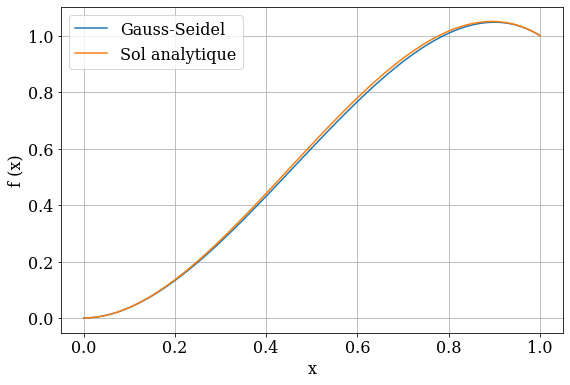

In [14]:
#On trace la fonction obtenue et on la compare avec la solution analytique. 

#On trace f(x)_numérique et f(x)_analytique.

pyplot.figure(figsize=(9.0, 6.0))
pyplot.plot(x,f,label='Gauss-Seidel')
pyplot.plot(x,fth,label='Sol analytique' )
pyplot.xlabel('x')
pyplot.ylabel('f (x)')
pyplot.grid()
pyplot.legend()
pyplot.show()



On peut voir la rapidité de la méthode Gaudd Seidel pour converger. 

Ici l'ordre de convergence est d'environ 0.64 au regard de la pente en échelle logaritmique de la différence en norme L2 en fonction du nombre d'itérations.

Ce n'est pas l'algorithme le plus performant donc. 

//anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


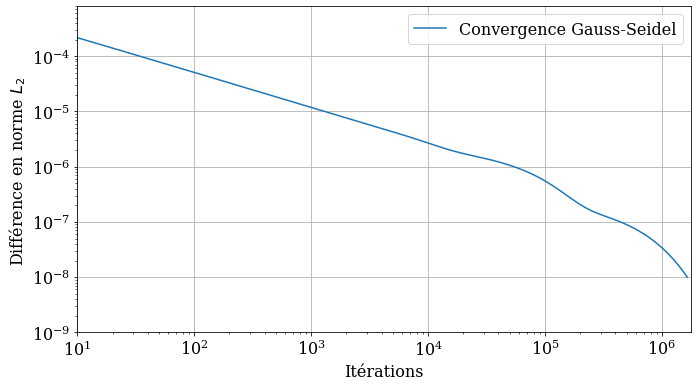

-0.6413141466953611


In [15]:
ite=np.linspace(0,1645791,1645791) #itérations

pyplot.figure(figsize=(11.0, 6.0))
pyplot.loglog(ite,conv_gs,label='Convergence Gauss-Seidel')
pyplot.ylabel('Différence en norme $L_2$ ')
pyplot.xlabel('Itérations')
pyplot.grid()
pyplot.xlim(10, 1780000);
pyplot.ylim(1e-9, 0.8e-3);
pyplot.legend()
pyplot.show()

#Calcul de la pente sur un intervalle de la droite.

slope, intercept = np.polyfit(np.log(ite[10: 100000]), np.log(conv_gs[10:100000]), 1)
print(slope)

**Gradient conjugué**

Essayons une autre méthode, plus performante en terme de convergence en norme L2. 
On résoud l'équation (1) avec la méthode du gradient conjugué.


La méthode du gradient conjugué résoud un système linéaire avec une matrice symmétrique et définie positive.

L'équation différentielle discrétisée correspond au système linéaire suivant : 

$$
\begin{equation}
A{\bf f}={\bf b},
\end{equation}
$$

où A est la matrice pour l'équation (1) discrétisée : 

$$
\begin{equation}
 \frac{d^4 f^k}{dx^4}-5 \frac{d^2 f^k}{dx^2}+ 4f^k = \frac{f^k_{i-2}-4f^k_{i-1}+6f^k_{i}-4f^k_{i+1}+f^k_{i+2}}{\Delta x^4} -5 \frac{f^k_{i-1}-2f^k_{i}+f^k_{i+1}}{\Delta x^2} + 4f^k_i 
\end{equation}
$$

en posant comme précdemment 
$$
\begin{align}
 B = -6 - 10\Delta x^2 - 4\Delta x^4 \\
 C= -4 - 5\Delta x^2
\end{align}
$$

on obtient 

$$
\begin{equation}
 A = \begin{pmatrix}
   1 & 0 & 0 & 0 & 0  & \cdots & \cdots  & 0 \\
   \frac{C}{(B-1)} & -1 & \frac{C}{(B-1)} & \frac{1}{(B-1)} & 0  & \cdots & \cdots  & 0     \\
   \frac{1}{B} & \frac{C}{B} & -1 & \frac{C}{B} & \frac{1}{B} & 0 & \ddots  &  \vdots   \\
   0      & \frac{1}{B} & \frac{C}{B} & -1 & \frac{C}{B} & \frac{1}{B} &  \cdots &  0       \\
   \vdots & 0       &  \frac{1}{B} & \frac{C}{B} & -1 & \frac{C}{B} & \frac{1}{B} & 0  \\
   0      & \cdots  & \ddots & 0 & \frac{1}{(B-1)}  & \frac{C}{(B-1)} & -1 & \frac{C}{(B-1)}    \\
   0      & \cdots & 0 & \cdots & 0 &  0 & 0 & 1     \\
    \end{pmatrix}
    .
    \begin{pmatrix}
     f_0 \\
     f_1 \\
      \vdots\\
     f_i \\
      \vdots\\
      \vdots\\
     f_{nx-2} \\
     f_{nx-1} \\
    \end{pmatrix}
    = \begin{pmatrix}
       0 \\
       0 \\
       \vdots\\
       \vdots\\
       0\\
        0 \\
     \frac{- 2\Delta x}{(B-1)}\\
       1 \\
   \end{pmatrix}
\end{equation}
$$

où $f$ est défini tel que $f_{0} = 0$ et $f_{nx-1} = -1$.

$f_{1}$ et $f_{nx-2}$ sont calculées comme dans la méthode précédente : 

$$
\begin{align}
f_{i=1}= \frac{1}{B-1} (f_{3} + C(f_{0}+f_{2})) \\
f_{i=nx-2}= \frac{1}{B-1} (f_{nx-4} + C(f_{nx-3}+f_{nx-1})- 2\Delta x)
\end{align}
$$



Chaque méthode itérative fonctionne avec une fonction initiale (guess) $\mathbf{f}^0$, qui se trouve modifié de façon à approcher la solution. 
On peut voir cette méthode comme la modification d'un vecteur de valeur discrètes de $f$ sur la grille en additionnant un autre vecteur (faire un pas de taille $\alpha$ dans la direction $\mathbf{d}$ comme cela :

$$
\begin{equation}
{\bf f}^{k+1}={\bf f}^k + \alpha {\bf d}^k
\end{equation}
$$

Les itérations progressent vers la solution en faisant des pas le long des vecteurs de direction ${\bf d}^k $, le scalaire $\alpha$ dictant la taille d'un pas à faire à chaque itération. 
Pour converger rapidement vers la solution on choisis les vecteurs de direction et la taille des pas judicieusement.
L'outils qu'on utilise pour trouver la bonne direction à suivre est appelé le * résiduel *.

Le résiduel se calcul comme tel : 
$$
\begin{equation}
{\bf r}^k={\bf b}-A{\bf f}^k
\end{equation}
$$

À l'itération $0$, on choisit une supposition initiale, on aura:

$$
\begin{equation}
{\bf b}-A{\bf f}^0={\bf r}^0\ne {\bf 0}
\end{equation}
$$

Le vecteur $ {\bf r} ^ 0 $ est le résidu initial et mesure à quelle point nous sommes loin de satisfaire le système linéaire. A chaque itération il devient de plus en plus petit:

$$
\begin{equation}
{\bf r}^k={\bf b}-A{\bf f}^k
\end{equation}
$$

Pour réduire le nombre de sauts en s'assurant que l'algorithme ne sélectionne jamais deux fois la même direction. La taille des sauts est désormais donnée par:

$$
\begin{equation}
\alpha = \frac{{\bf r}^k \cdot {\bf r}^k}{A{\bf d}^k \cdot {\bf d}^k}
\end{equation}
$$

et le vecteur de direction par : 

$$
\begin{equation}
{\bf d}^{k+1}={\bf r}^{k+1}+\beta{\bf d}^{k}
\end{equation}
$$

où $\beta = \frac{{\bf r}^{k+1} \cdot {\bf r}^{k+1}}{{\bf r}^k \cdot {\bf r}^k}$.

L'algorithme prend donc la forme suivante : 

On calcule ${\bf d}^0 = {\bf r}^0$ une fois, puis dans la boucle d'itération : 

1. On calcule $\alpha = \frac{{\bf r}^k \cdot {\bf r}^k}{A{\bf d}^k \cdot {\bf d}^k}$
2. On met à jour ${\bf f}^{k+1}$
3. Calcul de ${\bf r}^{k+1} = {\bf r}^k - \alpha A {\bf d}^k$
4. Calcul de $\beta = \frac{{\bf r}^{k+1} \cdot {\bf r}^{k+1}}{{\bf r}^k \cdot {\bf r}^k}$
5. Calcul de ${\bf d}^{k+1}={\bf r}^{k+1}+\beta{\bf d}^{k}$

Et on fait converger les méthodes itératives jusqu'à ce que la différence en norme L2 de deux itérations successives soit $\leq 10^{-8}$.

In [9]:
def conjugate_gradient(p0, b, dx,
                                  maxiter=20000, rtol=1e-6):
    """
    Résoud l'équation (1) sur une grille 1D uniforme avec espacement dx 
    en utilisant la méthode de relaxation du gradient conjugué. 
    
    Paramètres
    ----------
    p0 : numpy.ndarray
        La solution initiale mise sous forme d'un vecteur 1D.
    b : numpy.ndarray
        ici = 0 
    dx : float
        Taille de l'intervalle entre deux points du vecteur x discrétisé.
    maxiter : integer, optionnel
        Nombre maximum d'itération à effectuer;
        par défault: 20000.
    rtol : float, optionnel
        Minimum de convergence à atteindre;
        par défault: 1e-8.

    Sortie
    -------
    f : numpy.ndarray
        La solution mise sous forme d'un vecteur 1D.
    ite : integer
        Le nombre d'itérations effectuée.
    conv : list
        The convergence history as a list of floats.
    """
    B= -6 - 10*dx**2 - 4*dx**4
    C= -4 - 5*dx**2

    def A(p):        
        B= -6 - 10*dx**2 - 4*dx**4
        C= -4 - 5*dx**2
        Ap=np.zeros(len(p))
        
        Ap[2:-2]= (p[:-4] + p[4:] -4*p[1:-3] + 4*p[3:-1] + 6*p[2:-2])/dx**4 - 5*(p[1:-3] + p[3:-1] 
                    -2*p[2:-2])/dx**2 
                    + 4*p[2:-2] 
         
        Ap[1] = -p[1] + 1/(1-1/B)* 1/B * (C*(p[0]) + C*(p[2]) + (p[3]))
        Ap[-2] = -p[nx-2] + 1/(1-1/B)*1/B *(p[-4] + C*(p[-3]) + C*(p[-1]))
        Ap[-1]=1
        Ap[0]=1        
        return Ap    

    p = p0.copy()
    r = np.zeros_like(p)  # initial residual
    Ad = np.zeros_like(p)  # to store the mat-vec multiplication
    conv = []  # convergence history
    diff = rtol + 1  # initial difference
    ite = 0  # iteration index
    r= b - A(p)
    d = r.copy() #d_o=r_0 juste once 
    while diff > rtol and ite < maxiter:
        pk = p.copy()
        rk = r.copy()
        # Compute the Laplacian of the search direction.
        Ad = A(d)
        # Compute the step size.
        alpha = np.sum(r * r) / np.sum(d * Ad)
        # Update the solution.
        p = pk + alpha * d
        # Update the residual.
        r = rk - alpha * Ad
        # Update the search direction.
        beta = np.sum(r * r) / np.sum(rk * rk)
        d = r + beta * d
        # Dirichlet boundary conditions are automatically enforced.
        diff = L2_rel_erreur(p, pk)
        conv.append(diff)
        ite += 1
    return p, ite, conv

In [14]:
nx = 101  # number of points in the x direction
Lx = 1.0  # domain length in the x direction
dx = Lx / (nx - 1)  # grid spacing in x direction

# Create the gridline locations.
x = np.linspace(0.0, Lx, num=nx)

# On définit une fonction initiale tel que f(0)=0 et f(1)=1
f0 = x

B= -6 - 10*dx**2 - 4*dx**4
# On définit b 
b=np.zeros(nx)
b[-1]=1
b[-2]= -2*dx*1/(B-1)

# Compute the solution using the method of conjugate gradients.
f, ites, conv_cg = conjugate_gradient(f0, b, dx,
                                                maxiter=20000,
                                                rtol=1e-8)
print('Method of conjugate gradients: {} iterations '.format(ites) +
      'to reach a relative difference of {}'.format(conv_cg[-1]))

Method of conjugate gradients: 20000 iterations to reach a relative difference of 6.002515633800845e-05


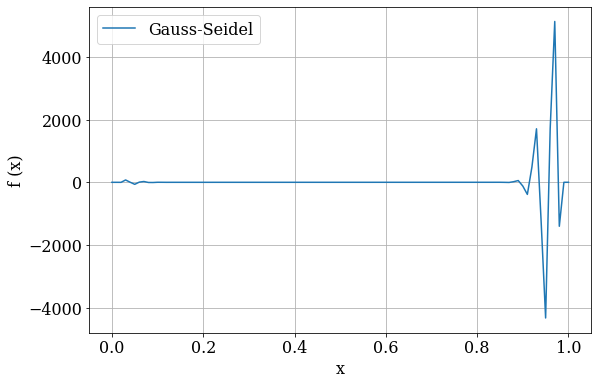

In [15]:
#On trace la fonction obtenue et on la compare avec la solution analytique. 
dx = Lx / (nx - 1)  # intervalle de discrétisation

x = np.linspace(0.0, Lx, num=nx)

#On trace f(x)_numérique et f(x)_analytique.

pyplot.figure(figsize=(9.0, 6.0))
pyplot.plot(x,f,label='Gauss-Seidel')
#pyplot.plot(x,fth,label='Sol analytique' )
pyplot.xlabel('x')
pyplot.ylabel('f (x)')
pyplot.grid()
pyplot.legend()
pyplot.show()

In [ ]:
ite=np.linspace(0,1645791,1645791) #itérations

pyplot.figure(figsize=(11.0, 6.0))
pyplot.loglog(ite,conv_cg,label='Convergence gradient conjugué')
pyplot.ylabel('Différence en norme $L_2$ ')
pyplot.xlabel('Itérations')
pyplot.grid()
pyplot.xlim(10, 1780000);
pyplot.ylim(1e-9, 0.8e-3);
pyplot.legend()
pyplot.show()

#Calcul de la pente sur un intervalle de la droite.
slope, intercept = np.polyfit(np.log(ite[10: 100000]), np.log(conv_gs[10:100000]), 1)
print(slope)